# Assignment 3: Logistic Regression


## Problem statement

You are working as a Data Scientist at a Finance company which proposes home loans. When a customer applies for a home loan, the company studies his demand to decide whether he/she is eligible or not.

Your boss asks you to develop a decision-aid tool to automate the loan eligibility process. The tool is supposed to be given as input the information provided by the customer while filling his/her online loan application form. These information include customer's personal citeria such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, etc... To develop the algorithm/model to be applied in the tool, you are given a data set containing historical information about applicants (**features**) as well as their loan status (**output** given as binary variable indicating whether or not a the loan was approved).

Load image

1- Load data

In [629]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline

In [630]:
df = pd.read_csv("loan_prediction.csv")
df.shape

(614, 13)

In [631]:
assert df.shape == (614, 13)

In [632]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


2- Remove the "Loan_ID" column, and then transform the "Loan_Status" feature from categorical into numerical values (Y ==> 1, N ==> 0)

In [633]:
df.drop(columns=['Loan_ID'], inplace=True)
df['Loan_Status'].replace(["Y","N"],[1,0], inplace = True)

In [634]:
assert df.shape == (614, 12); assert df["Loan_Status"].dtype != 'O'

## Data Exploration

3- Build a dataframe named `stats` displaying information about df columns. The index is the columns names and the columns are the following :

* `type` : type of the column
* `# null` : number of null values
* `# unique` : number of unique values
* `unique values` : unique values, concatenated as one text separated with ` - `. If the number of unique values is greater than equal 10 (>= 10), print only the the first *20* characters followed by `...`

`stats` would look like this (only the last rows are displayed)

![](img/stats.png)

In [635]:
index = []
data = []
col = ["type", "# null", "# unique", "unique values"]  

for i in df.columns :
    index.append(i)
    data.append([df[i].dtypes, 
                 df[i].isnull().sum(), 
                 df[i].nunique(),
                ("-".join([str(element) for element in df[i].ffill().unique()]))[0:20] + "..." if df[i].nunique() >= 10
                 else ("-".join([str(element) for element in df[i].ffill().unique()])) ])
    

In [636]:
stats = pd.DataFrame(data, index, col)
stats

,type,# null,# unique,unique values
Gender,object,13,2,Male-Female
Married,object,3,2,No-Yes
Dependents,object,15,4,0-1-2-3+
Education,object,0,2,Graduate-Not Graduate
Self_Employed,object,32,2,No-Yes
ApplicantIncome,int64,0,505,5849-4583-3000-2583-...
CoapplicantIncome,float64,0,287,0.0-1508.0-2358.0-41...
LoanAmount,float64,22,203,nan-128.0-66.0-120.0...
Loan_Amount_Term,float64,14,10,360.0-120.0-240.0-18...
Credit_History,float64,50,2,1.0-0.0


4- Fill the null values in the column **[Married]** by the most frequent one (which is "Yes"). Then, remove all the rows containing at least one NullValue.

In [637]:
df['Married'].fillna(df['Married'].mode())
df.dropna(inplace=True)
print(df.shape)

(480, 12)


In [638]:
assert df.isnull().sum().sum() == 0

# Data Visualization

5-1- Plot a **bar plot** of the column **Loan_Status** (% of each class). 

<AxesSubplot:xlabel='Loan_Status'>

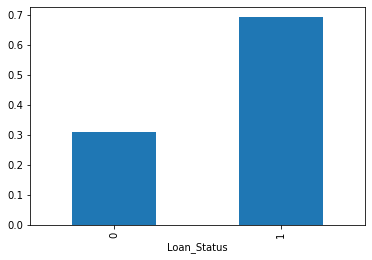

In [639]:
(df.groupby('Loan_Status').size()/df.shape[0]).plot(kind="bar")

5-2- How many approved and non approved loans are there ? How much accuracy can you get if prediction is always equal to "*1*" ?

In [640]:
df.groupby('Loan_Status').size()

Loan_Status
0    148
1    332
dtype: int64

In [641]:
print('Loans approved rate =', df['Loan_Status'].mean())

Loans approved rate = 0.6916666666666667


6-1- Create a function to be named **make_bar_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a borplot of the approval rate `Loan_Status` by value of the column.

Calling `make_bar_plot` on `Property_Area` should look like this

![](img/bar_plot.png)

In [668]:
import matplotlib.colors as mcolors
def make_bar_plot(df, column):
    df.groupby(column).mean()['Loan_Status'].plot(kind="barh", color=mcolors.TABLEAU_COLORS, title="Approval rate of loans per "+str(column))
    plt.show()

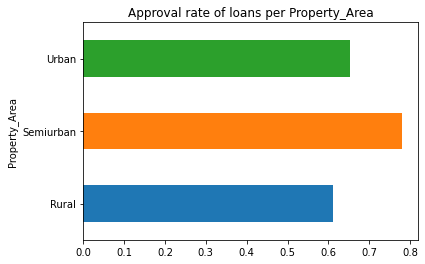

In [669]:
make_bar_plot(df, 'Property_Area')

6-2- Create a function to be named **make_box_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a boxplot of the distribution of the column by `Loan_Status`.

Calling `make_box_plot` on `ApplicantIncome` should look like this

![](img/box_plot.png)

In [611]:
def make_box_plot(df, column):  
    fig = plt.figure(figsize=(12, 6))
    fig.clf()
    ax = fig.gca()  
    df.boxplot(column = [column], by = ['Loan_Status'], ax = ax)   
    plt.xlabel('Loan Status')
    plt.ylabel(column)
    plt.show()

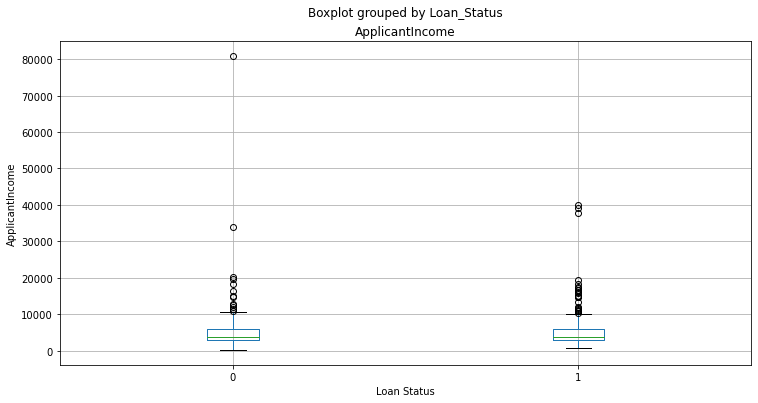

In [612]:
make_box_plot(df, 'ApplicantIncome')

6-3- Loop through df columns, except for the target and make a plot depending:

* if the column is numeric, call `make_box_plot`
* else, call `make_bar_plot`

****************** Gender *******************


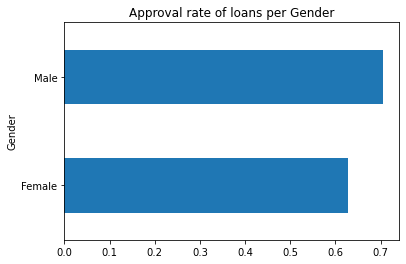

****************** Married *******************


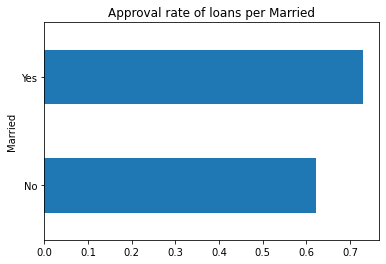

****************** Dependents *******************


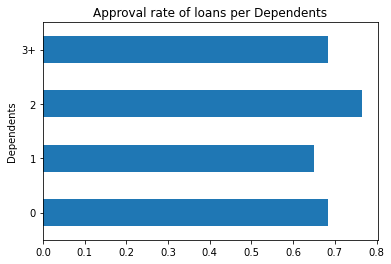

****************** Education *******************


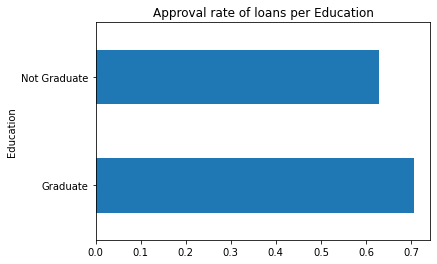

****************** Self_Employed *******************


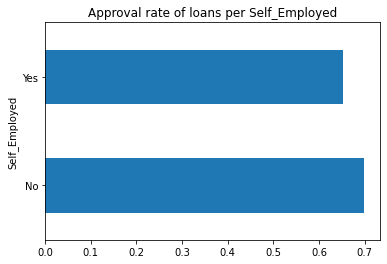

****************** ApplicantIncome *******************


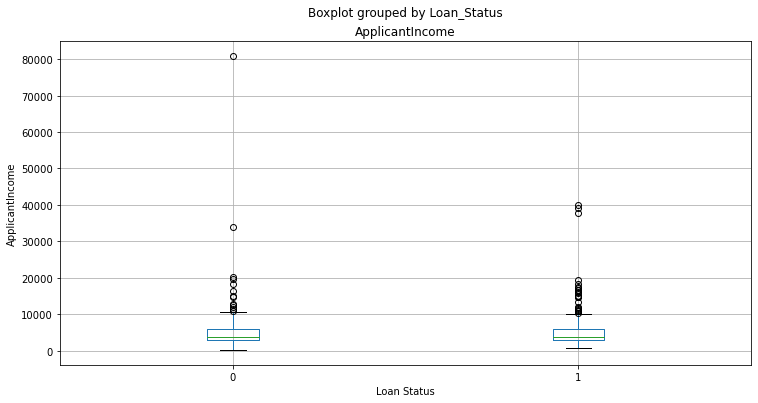

****************** CoapplicantIncome *******************


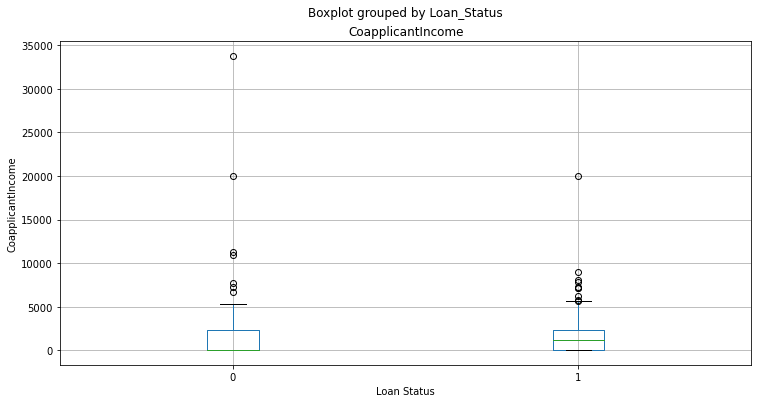

****************** LoanAmount *******************


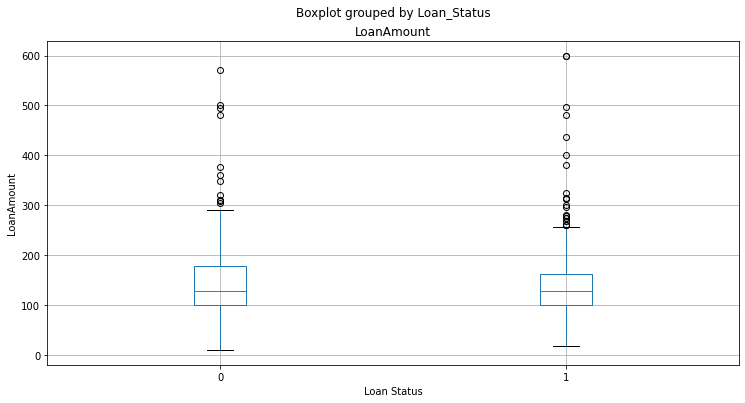

****************** Loan_Amount_Term *******************


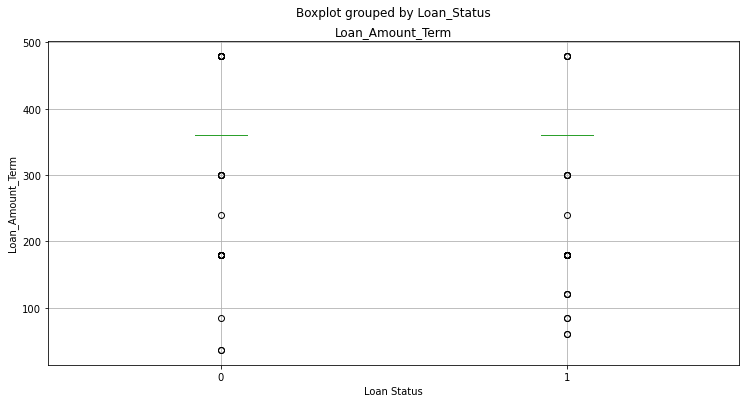

****************** Credit_History *******************


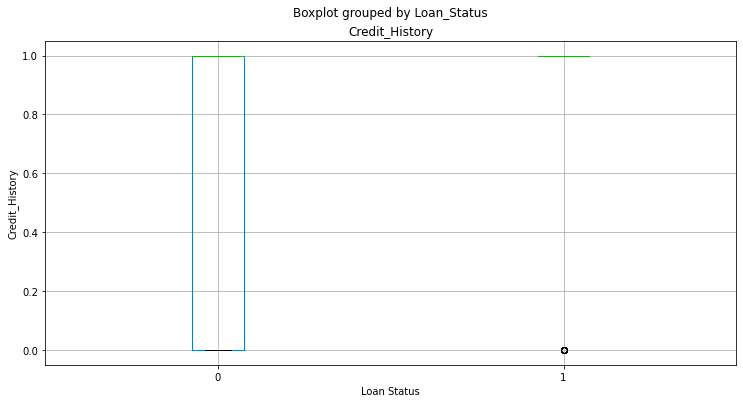

****************** Property_Area *******************


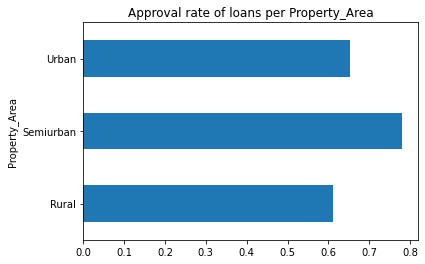

In [613]:
for col in df.loc[:, df.columns != 'Loan_Status'] :
    print(f'****************** {col} *******************')
    if(np.issubdtype(df[col].dtype, np.number)):
        make_box_plot(df, col)
    else:
        make_bar_plot(df, col) 

# Model Training & Evaluation

7-1- Use [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to transform `Property_Area` and `Dependents` into dummy variables

In [614]:
df = pd.get_dummies(df, columns=['Property_Area', 'Dependents'])

print the head of df

In [615]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,0
5,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,0,1,0


In [616]:
assert df.shape == (480, 17)

7-2- Use `pandas.Categorical` (as seen in *Titanic* notebook) to transform the remaining text columns of df into numerical ones

In [617]:
for col in df.columns:
    if df[col].dtype == object:
        df[col] = pd.Categorical(df[col]).codes

Print the head of df

In [618]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,0
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,0,1,0


In [619]:
assert 'object' not in [df[f].dtype for f in df.columns]

8-1 Load the target variable "Loan_Status" into a dataframe and call it y. Then, load the features into a second dataframe and call it X. 

In [620]:
y = pd.DataFrame(df['Loan_Status'])
X = df.drop(columns='Loan_Status')
print (X.columns)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')


8-2 Split the data set into a training set and a test set. Set: test_size=0.3, random_state=123

In [710]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (336, 16) (336, 1)
test shape (144, 16) (144, 1)


8-3- Fit a logistic model to the training set, and then report the training and testing accuracies

In [711]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.7886904761904762
test accuracy = 0.7152777777777778


9- Print the confusion matrix and compute the **precision** for class **0**, **recall** for class **1** using the formulas learned in class (you should not use metrics.classification_report)

In [712]:
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)

In [729]:
x = metrics.confusion_matrix(y_test, y_pred)
precision_0 = x[0][0]/(x[0][0]+x[1][0])
recall_1 = x[1][1]/(x[1][1]+x[1][0])
print ('precision_0 =', precision_0)
print ('recall_1 =', recall_1)

precision_0 = 0.6666666666666666
recall_1 = 0.8924731182795699


10- Use 5-fold [cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and choose `f1` for scoring. Print the mean and standard deviation of scores

In [681]:
from sklearn.model_selection import cross_val_score

clf = LogisticRegression()
scores = cross_val_score(clf, X, y, scoring='f1', cv=5)
print(scores)
print ('scores mean =', scores.mean(), 'scores std =', scores.std())

[0.87248322 0.8590604  0.8590604  0.91549296 0.86111111]
scores mean = 0.8734416191406457 scores std = 0.02160978392490238


how is the mean `f1_score` compared to the first one with train_test_split

Looks good. It's still performing at the same range of f1 score.

In [726]:
f1_score = 2 * (precision_0 * recall_1)/(precision_0 + recall_1)
print(f1_score)

0.8019323671497586
